In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Rectum_Rectum_HCLAdultRectum1"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/db_v1/Rectum_Rectum_HCLAdultRectum1/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


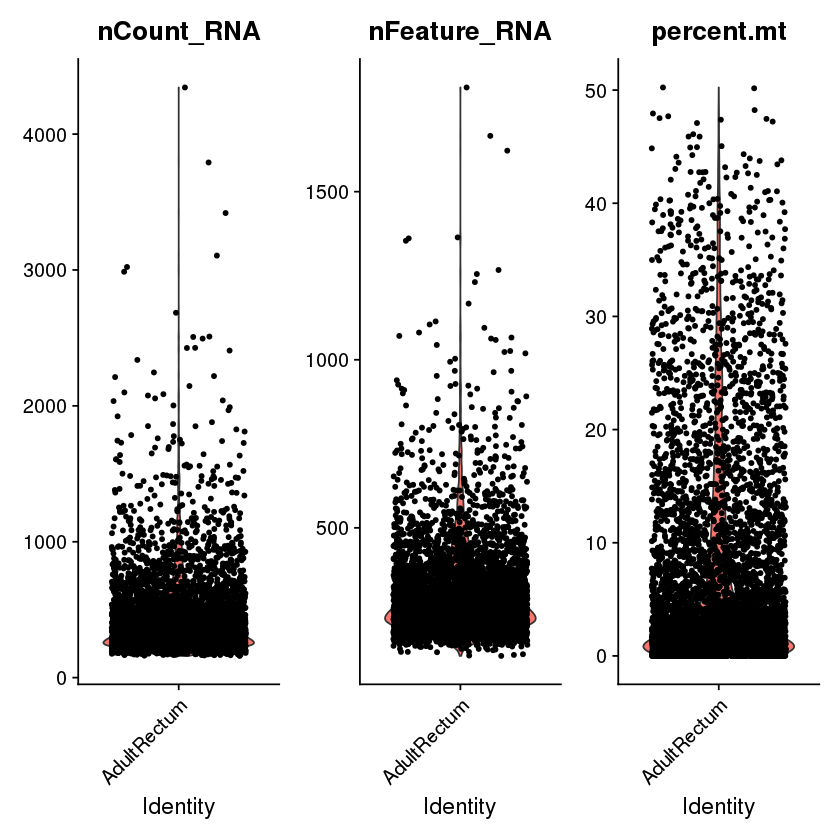

In [5]:
# Pre-processing
min.cells = 10
min.features = 50
nFeature_RNA_range = c(min.features, 1000)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [31]:
percent.mt.thre = 15
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [6]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 12233 by 5718

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5718 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 34 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 12233 genes



  |======================================================================| 100%


Computing corrected count matrix for 12233 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.135484 mins

Determine variable features

Set 3000 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  FABP1, PHGR1, S100A6, CKB, CA1, PIGR, SLC26A2, FXYD3, CES2, CD24 
	   TSPAN1, CA2, MUC12, SLC26A3, GUCA2A, S100A10, HSD11B2, IFI27, ELF3, KRT20 
	   GPA33, CDH17, ST14, CA12, HES1, TMEM54, PLA2G2A, CDHR5, AGR2, PARM1 
Negative:  RPS27, CD74, TMSB4X, B2M, RPL21, DNAJB1, HLA-DRA, RPS29, RPS27A, RPLP1 
	   RPS14, HSPE1, RPL27A, RPS19, HSPA1A, RPL7, RPS6, RPL10, CACYBP, RPS3 
	   HLA-DRB1, RPS3A, RPL34, RPL3, HSP90AA1, HLA-DPB1, HSP90AB1, SRGN, HSPA8, RPL13 
PC_ 2 
Positive:  DCN, MGP, ADH1B, CFD, MFAP4, MFAP5, GPX3, C1R, SFRP2, SERPING1 
	   IGFBP7, CXCL12, C1S, CTSK, MFGE8, IGFBP6, IGFBP5, MMP2, LUM, GPNMB 
	   EFEMP1, PRELP, SDC2, FBLN1, PLPP3, SERPINF1, SCARA5, PODN, ISLR, NNMT 
Negative:  PHGR1, FABP1, CA1, JCHAIN, CKB, IGHA1, IGKC, SLC26A2, CD52, CD79A 
	   RPS29, PIGR, MS4A1, FXYD3, CD24, LTB, RPL21, IGLC2, RPS19, RPL13A 
	   SLC26A3, GPA33, CES2, AL928768.3, MZB1, IGHM, HSD11B2, TSPAN1, HSPE1, VPREB3 
PC_ 3 
Positive:  LYZ, HSPA1A, TYROBP, FPR1, FCER1G, HSP90AA1, 

png 
  2

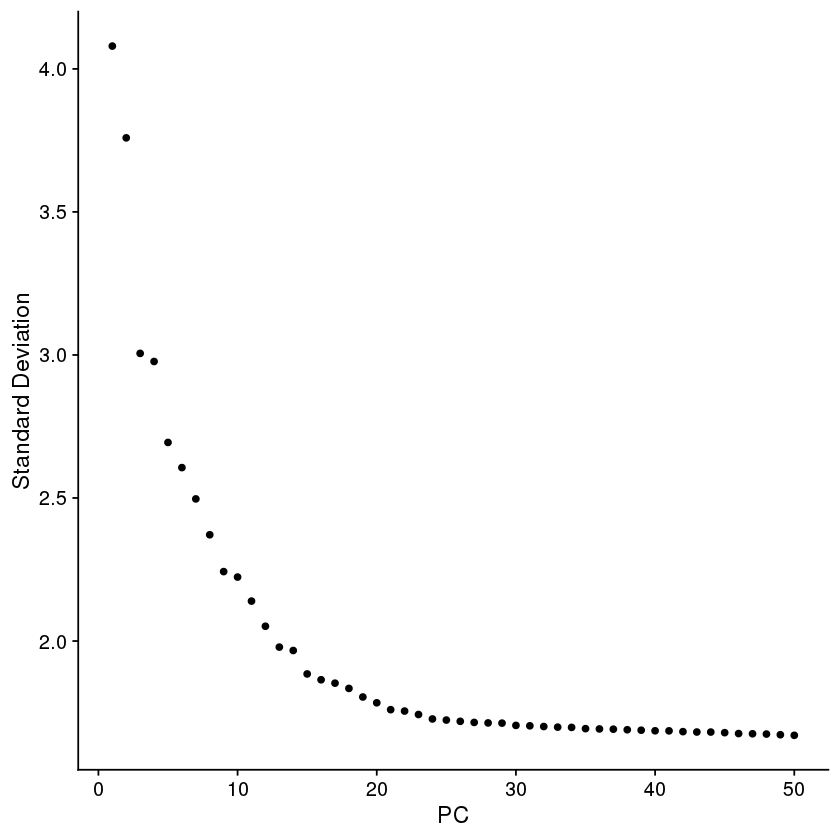

In [7]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [8]:
pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [11]:
dataobj <- FindClusters(dataobj, resolution = 0.59, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5718
Number of edges: 256378

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.7889
Number of communities: 14
Elapsed time: 0 seconds


ARI 
0.5158711

In [12]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:29:39 UMAP embedding parameters a = 0.9922 b = 1.112

15:29:39 Read 5718 rows and found 30 numeric columns

15:29:39 Using Annoy for neighbor search, n_neighbors = 30

15:29:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

15:29:41 Writing NN index file to temp file /tmp/RtmpDRf5Rb/file688c1223ceef

15:29:41 Searching Annoy index using 1 thread, search_k = 3000

15:29:43 Annoy recall = 100%

15:29:44 Commencing smooth kNN distance calibration using 1 thread

15:29:45 Initializing fr

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


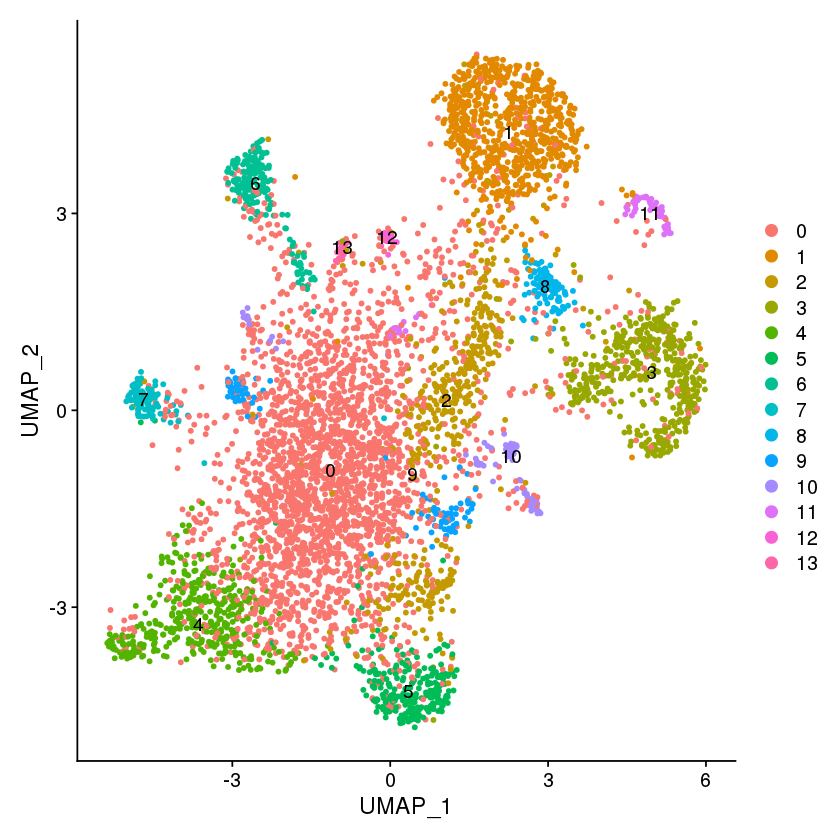

In [13]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

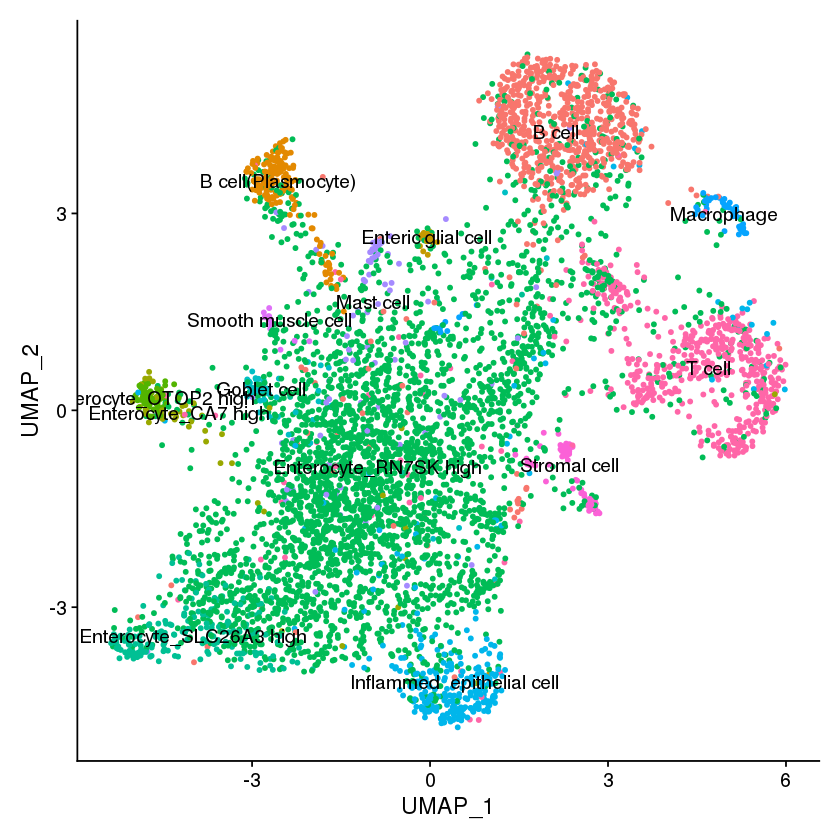

In [14]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [30]:
new.cluster.ids <- c("Intestine Rectum-Epithelial tissue-Enterocyte-RN7SK", 
                     "Intestine Rectum-Connective tissue-B cell-CD74", 
                     "Intestine Rectum-Epithelial tissue-Enterocyte-RN7SK", 
                     "Intestine Rectum-Connective tissue-T cell-IL32", 
                     "Intestine Rectum-Epithelial tissue-Enterocyte-SLC26A3", 
                     "Intestine Rectum-Epithelial tissue-Inflamed epithelial cell-EGR1", 
                     "Intestine Rectum-Connective tissue-Plasma B cell-JCHAIN", 
                      "Intestine Rectum-Epithelial tissue-Enterocyte-CA7", 
                      "Unclassified",
                     "Intestine Rectum-Epithelial tissue-Enterocyte-RN7SK", 
                     "Intestine Rectum-Connective tissue-Stromal cell-FBLN1",
                     'Intestine Rectum-Connective tissue-Macrophage-C1QA',
                     'Intestine Rectum-Nerve tissue-Enteric glial cell-PLP1',
                     "Intestine Rectum-Connective tissue-Mast cell-CPA4"
                    )

In [31]:
subset(dataobj.markers,cluster=='13')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CPA3,0.000000e+00,0.8494593,0.739,0.004,0.000000e+00,13,CPA3
GATA2,2.891214e-284,0.5512803,0.478,0.002,3.536823e-280,13,GATA2
TPSAB1,1.523223e-234,1.4304754,0.739,0.009,1.863359e-230,13,TPSAB1
CTSG,3.048511e-221,0.4189763,0.304,0.001,3.729244e-217,13,CTSG
HPGDS,1.377880e-216,0.6007716,0.348,0.001,1.685561e-212,13,HPGDS
TPSB2,3.924579e-151,2.3046877,0.957,0.028,4.800938e-147,13,TPSB2
RGS13,5.196954e-97,0.2639488,0.217,0.002,6.357434e-93,13,RGS13
GLUL,1.148787e-40,0.6282063,0.609,0.042,1.405312e-36,13,GLUL
SGK1,2.128584e-36,0.4552596,0.391,0.019,2.603896e-32,13,SGK1


In [32]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [33]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

15:45:16 UMAP embedding parameters a = 0.9922 b = 1.112

15:45:16 Read 5718 rows and found 30 numeric columns

15:45:16 Using Annoy for neighbor search, n_neighbors = 30

15:45:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

15:45:18 Writing NN index file to temp file /tmp/RtmpDRf5Rb/file688c708555be

15:45:18 Searching Annoy index using 1 thread, search_k = 3000

15:45:20 Annoy recall = 100%

15:45:21 Commencing smooth kNN distance calibration using 1 thread

15:45:22 Initializing from normalized Laplacian + noise

15:45:22 Commencing optimization for 500 epochs, with 253180 positive edges

15:45:42 Optimization finished



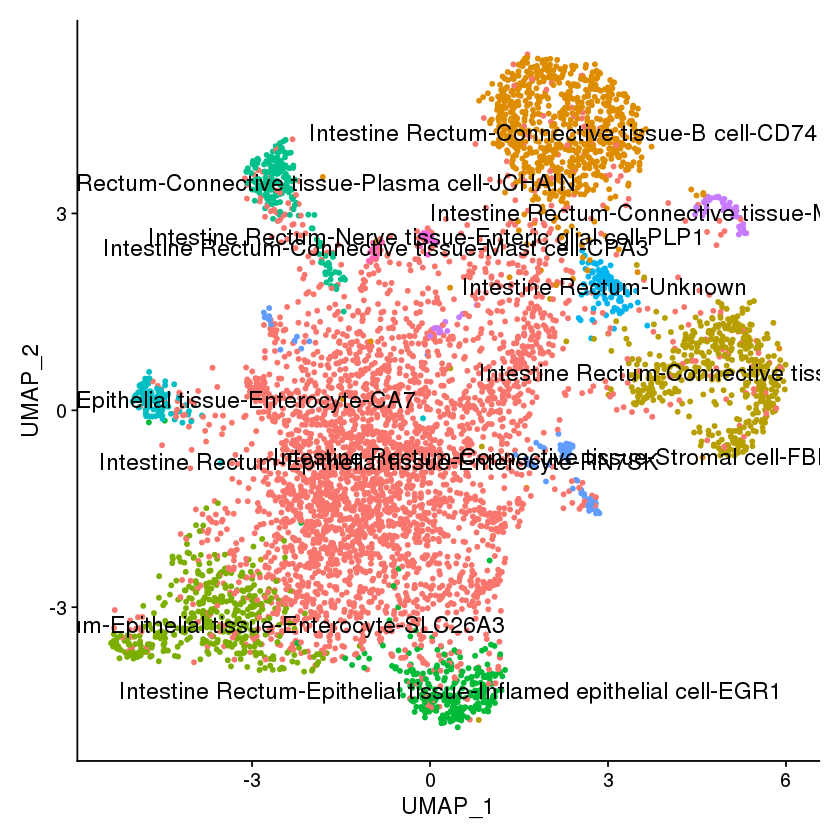

In [34]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [15]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE,)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



In [65]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [4]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [35]:
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [6]:
dataobj.dbupload_v1 <- readRDS( file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))
unique(dataobj.dbupload_v1[['hcad_name']])

,hcad_name
,<chr>
AdultRectum_1.AAAACGAAGCGGCAACAA,Rectum-Epithelial tissue-Enterocyte-RN7SK
AdultRectum_1.AAAACGAAGCGGTGAAGC,Rectum-Connective tissue-B cell-CD74
AdultRectum_1.AAAACGACTTATGCGAAT,Rectum-Epithelial tissue-Enterocyte-CA7
AdultRectum_1.AAAACGAGTCGTTGATCA,Rectum-Epithelial tissue-Inflamed epithelial cell-EGR1
AdultRectum_1.AAAACGATGGCGGCAGGA,Rectum-Connective tissue-T cell-IL32
AdultRectum_1.AAAACGATTTGCTCAAAG,Rectum-Epithelial tissue-Enterocyte-SLC26A3
AdultRectum_1.AAAACGGATCTTCGTATT,Rectum-Connective tissue-Plasma cell-JCHAIN
AdultRectum_1.AAAACGGGGCGATAAGGG,Rectum-Nerve tissue-Enteric glial cell-PLP1
AdultRectum_1.AAAACGGTTGCCTTTAGG,Unknown


In [13]:
dataobj.dbupload_v1

An object of class Seurat 
43878 features across 5718 samples within 1 assay 
Active assay: RNA (43878 features, 0 variable features)

In [14]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization
dataobj = dataobj.dbupload_v1
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot

pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- RunUMAP(dataobj,dims=1:pcDim)

Centering and scaling data matrix

PC_ 1 
Positive:  RPS27, CD74, B2M, TMSB4X, RPL21, DNAJB1, RPS27A, RPLP1, RPS14, RPS29 
	   RPL7, HSPE1, RPL27A, HSPA1A, RPS3A, RPS19, RPS6, RPL3, HSP90AA1, RPS3 
	   RPL34, HLA-DRA, CD52, RPL30, LAPTM5, RGS2, FTL, RPS15, ARHGDIB, RPS18 
Negative:  MT-ND2, MT-CO2, MT-ATP6, MT-CO1, MT-CO3, MT-ND3, MT-ND1, MT-ND4, FABP1, PIGR 
	   MT-CYB, MT-ND5, CKB, MT-RNR2, S100A6, SLC26A2, CA1, FXYD3, MT-RNR1, MTATP6P1 
	   MT-ND4L, CA2, CD24, TSPAN1, MUC12, MTCO1P12, ELF3, HSD11B2, SLC26A3, CA12 
PC_ 2 
Positive:  MT-CO1, MT-CO3, MT-ND4, MT-ATP6, MT-ND2, MT-CYB, MT-RNR2, MT-ND1, MT-CO2, MT-ND3 
	   MT-RNR1, RPS19, MT-ND5, RPS29, RPS18, CD74, HSP90AA1, RPL27A, RPS6, RPS27 
	   RPL34, MTATP6P1, TMSB4X, B2M, RPL31, HSPE1, MT-ND4L, RPLP2, RPL21, RPS14 
Negative:  DCN, ADH1B, MFAP4, SERPING1, C1R, IGFBP7, MGP, MFGE8, CXCL12, GPX3 
	   C1S, CFD, IGFBP5, FBLN1, IGFBP6, LUM, SFRP2, MFAP5, SPARC, COL1A2 
	   EFEMP1, PRELP, PLTP, CCDC80, SERPINF1, APOD, SPARCL1, GSN, CYBRD1,

In [5]:
saveRDS(dataobj.dbupload_v1, file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))

In [3]:
dataobj.dbupload_v1 = readRDS(paste0(datasetName,".seuratobj.dbupload_v1.rds"))